## Super resolution test

In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

from torchvision.models import vgg16_bn

In [2]:
arch = models.resnet34

In [30]:
size=(300,300)

In [31]:
path = Path('./test_data')

In [32]:
data = (ImageImageList.from_folder(path/'cellsLR').split_by_rand_pct(.5, seed=42)
          .label_from_func(lambda x: path/'cellsHR'/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data.c = 3

In [33]:
learn = unet_learner(data, arch, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [34]:
learn.load('./2b');

In [35]:
learn.data = data

In [46]:
fn = data.train_ds.x.items[2]; fn

PosixPath('test_data/cellsLR/L02_s1_w1.png')

In [47]:
img = open_image(fn); img.shape

torch.Size([3, 103, 103])

In [48]:
p,img_hr,b = learn.predict(img)

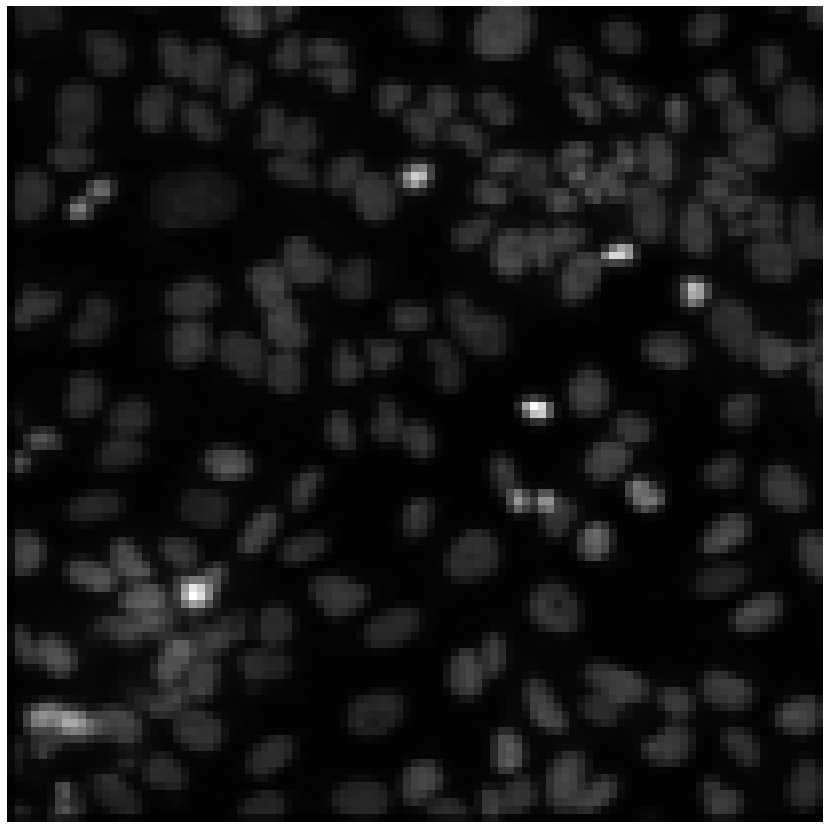

In [49]:
show_image(img, figsize=(15,15), interpolation='nearest');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


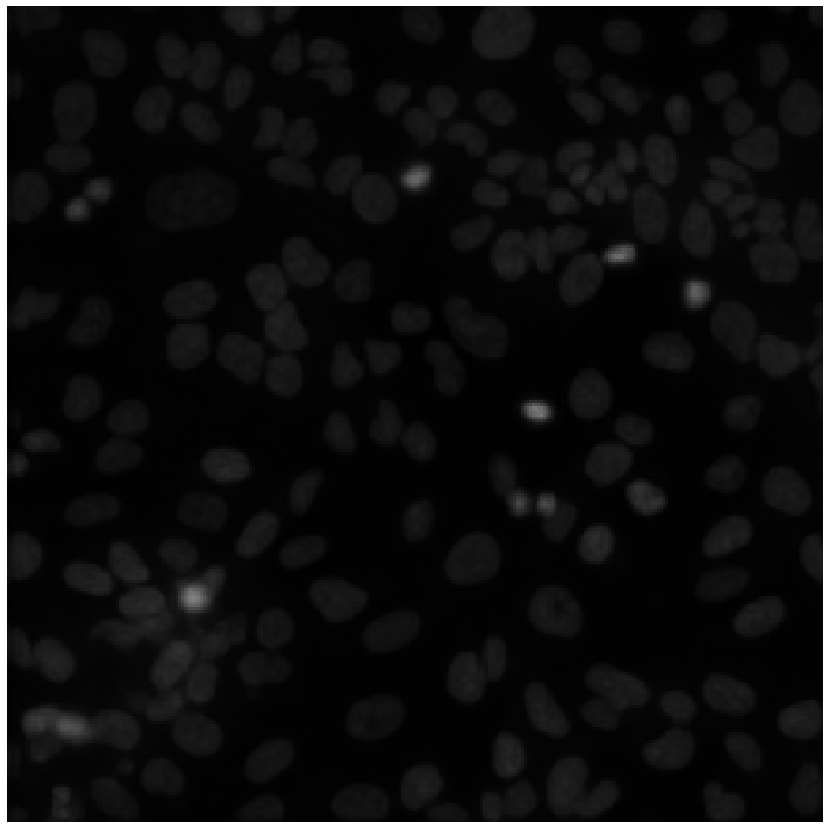

In [50]:
Image(img_hr).show(figsize=(15,15))

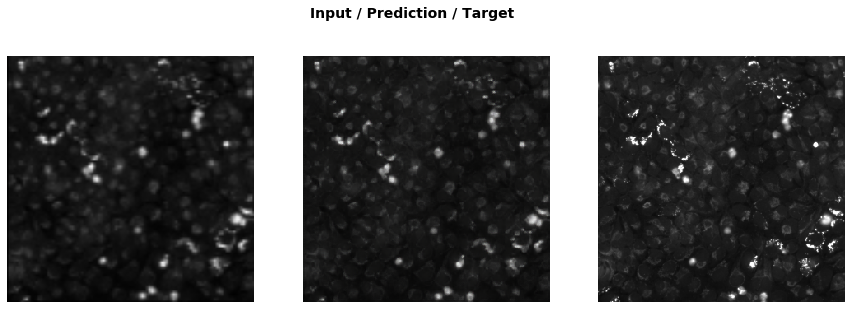

In [51]:
learn.show_results(imgsize=5, cmap='gray')

In [52]:
savename = ''
savepath = Path('./results/cells')
Image(img_hr).save(savename)

NameError: name 'savename' is not defined